<a href="https://colab.research.google.com/github/Rahul711sharma/Regressions-ML/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Seoul Bike Sharing Demand Prediction </u></b>

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [115]:
pip install shap

     |████████████████████████████████| 358kB 7.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=6474ebd1356a40328785743253102b73444735d8ec86fcf57f437e5650891c02
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [116]:
import shap

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
import datetime as dt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Rahul711sharma/Seoul-Bike-Sharing-Demand-Prediction-WIP-/main/SeoulBikeData.csv",encoding= 'unicode_escape',date_parser="Date")

# Exploratory Data analysis

In [4]:
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [5]:
df.shape

(8760, 14)

In [6]:
df.describe(include='all')

Date  Rented Bike Count  ...     Holiday  Functioning Day
count         8760        8760.000000  ...        8760             8760
unique         365                NaN  ...           2                2
top     26/08/2018                NaN  ...  No Holiday              Yes
freq            24                NaN  ...        8328             8465
mean           NaN         704.602055  ...         NaN              NaN
std            NaN         644.997468  ...         NaN              NaN
min            NaN           0.000000  ...         NaN              NaN
25%            NaN         191.000000  ...         NaN              NaN
50%            NaN         504.500000  ...         NaN              NaN
75%            NaN        1065.250000  ...         NaN              NaN
max            NaN        3556.000000  ...         NaN              NaN

[11 rows x 14 columns]

In [7]:
df.shape

(8760, 14)

In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Extracting Features from ``Date``**

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month']= pd.DatetimeIndex(df['Date']).month
df['weekday']=pd.DatetimeIndex(df['Date']).weekday

In [10]:
df.head(3)

Date  Rented Bike Count  Hour  ...  Day  Month  weekday
0 2017-01-12                254     0  ...   12      1        3
1 2017-01-12                204     1  ...   12      1        3
2 2017-01-12                173     2  ...   12      1        3

[3 rows x 18 columns]

In [11]:
display(df['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

``weekday`` is in range 0-6 so we need to make it in normal 1-7.

In [12]:
df['weekday'] = np.array(df['weekday'])+1
display(df['weekday'].unique())


array([4, 7, 3, 5, 1, 6, 2])

##**Demand of rented bikes at different times of years**

In [13]:
Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

weekday  Rented Bike Count
0        1             863563
1        2             862877
2        3             908871
3        4             928267
4        5             898966
5        6             911475
6        7             798295

In [14]:
df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [15]:
df.groupby(['Year','Month']).agg({'Rented Bike Count':['sum']}).reset_index()

Year Month Rented Bike Count
                             sum
0   2017     1              9539
1   2017     2              8523
2   2017     3              7222
3   2017     4              8729
4   2017     5              8307
5   2017     6              6669
6   2017     7              8549
7   2017     8              8032
8   2017     9              7233
9   2017    10              3453
10  2017    11              5848
11  2017    12            103226
12  2018     1            277705
13  2018     2            255589
14  2018     3            447815
15  2018     4            547490
16  2018     5            657641
17  2018     6            700059
18  2018     7            682790
19  2018     8            606158
20  2018     9            492093
21  2018    10            623535
22  2018    11            487564
23  2018    12            208545

In [16]:
month_year_group= df.groupby(by=['Month','Year']).agg({'Rented Bike Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented Bike Count',x= 'Month',color= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=400)

* There's is a whooping increase in number of bike rents in year 2018. 
* But also, there is a decline in the end of the year. This could be repercussions of winter season.

In [17]:
px.bar(month_year_group,y= 'Rented Bike Count',x= 'Month',facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


In [18]:
day_year_group= df.groupby(by=['Day','Year']).agg({'Rented Bike Count':'sum'}).reset_index()

In [19]:
px.line(day_year_group,y= 'Rented Bike Count',x= 'Day',color= 'Year',title='Total Rented Bikes on daily basis in 2017 and 2018',width=800, height=400)

In [20]:
weekday_year_group= df.groupby(by=['weekday','Year']).agg({'Rented Bike Count':'sum'}).reset_index()
px.line(weekday_year_group,y= 'Rented Bike Count',x= 'weekday',color= 'Year',title='Total Rented Bikes on weekday basis in 2017 and 2018',width=800, height=400)

We can clearly conclude here that this business seems new in year 2017 and demand increases significantly in 2018

##**Categorical Feature Exploration**

In [21]:
Rented_bike_seasons= df.groupby(by=['Year','Seasons']).agg({'Rented Bike Count':'sum'}).reset_index()
px.bar(Rented_bike_seasons,y= 'Rented Bike Count',x= 'Seasons',facet_col='Year',title='Total Rented Bikes in diffrent Seasons in 2017 and 2018',width=800, height=500)

In [22]:
for i in df.columns:
  if i not in list(df.describe().columns)+['Date']:
    print(f"{i}:\n {df[i].value_counts()} \n")

Seasons:
 Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday:
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day:
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Seasons')

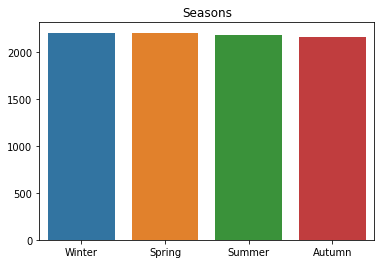

In [23]:
sns.barplot(df['Seasons'].unique(),list(pd.DataFrame(df['Seasons'].value_counts()).iloc[:,0]))
plt.title('Seasons')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Holiday')

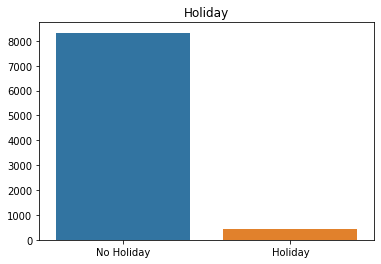

In [24]:
sns.barplot(df['Holiday'].unique(),list(pd.DataFrame(df['Holiday'].value_counts()).iloc[:,0]))
plt.title('Holiday')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Functioning Day')

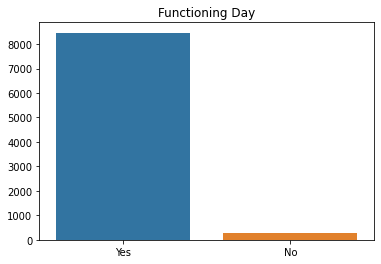

In [25]:
sns.barplot(df['Functioning Day'].unique(),list(pd.DataFrame(df['Functioning Day'].value_counts()).iloc[:,0]))
plt.title('Functioning Day')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



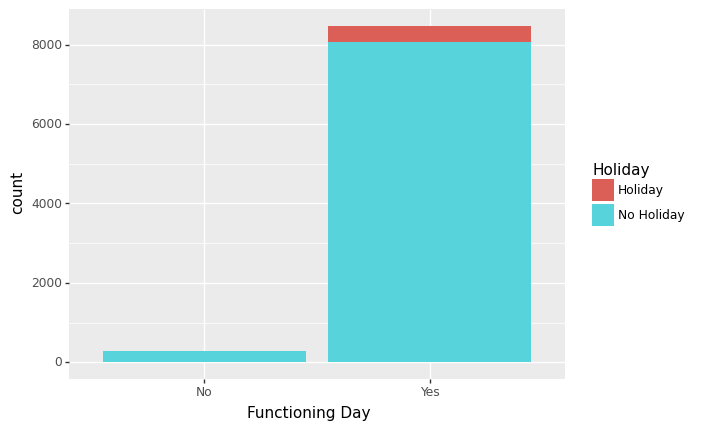

<ggplot: (8745143629801)>

In [26]:
ggplot(df)+ aes('Functioning Day',fill='Holiday')+geom_bar()

* Here's an ironic insight, all the holidays are falling on the functioning Days.


##Analysis of Numeric Variables

In [27]:
df.describe()

Rented Bike Count         Hour  ...        Month      weekday
count        8760.000000  8760.000000  ...  8760.000000  8760.000000
mean          704.602055    11.500000  ...     6.526027     4.021918
std           644.997468     6.922582  ...     3.448048     1.999994
min             0.000000     0.000000  ...     1.000000     1.000000
25%           191.000000     5.750000  ...     4.000000     2.000000
50%           504.500000    11.500000  ...     7.000000     4.000000
75%          1065.250000    17.250000  ...    10.000000     6.000000
max          3556.000000    23.000000  ...    12.000000     7.000000

[8 rows x 14 columns]

In [28]:
px.histogram(df, x="Rented Bike Count",marginal="box",color='Year')

* Data is Positive skewed

In [29]:
px.histogram(df, x=np.sqrt(df["Rented Bike Count"]),
                   marginal="violin",color='Year',title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

**Correlation of number of rented bikes with other numeric variables**

In [30]:
px.scatter(df,'Hour','Rented Bike Count',trendline="ols",trendline_color_override='yellow')

In [31]:
for i in df.describe().columns:
  if i not in ['Rented Bike Count','Year','Day','Month','weekday','Hour']:
    display(px.scatter(df,i,'Rented Bike Count',trendline="ols",trendline_color_override='yellow',opacity=0.6,title=f"{i} and Rented Bike Count"),width=500,length=500)

* Number of bikes rented is most positively correlated to ``Temperature`` and ``Dew Point Temperature``.
*  Number of bikes rented is most negatively correlated ``Snowfall (cm)`` and ``Humidity``

**Label Encoding and one-hot encoding**

In [32]:
df = df.replace({'No':0,'Yes':1,'Holiday':1,'No Holiday':0})

In [33]:
season_dummy = pd.get_dummies(df['Seasons'])
for i in season_dummy.columns:
  df[i]= season_dummy[i]
df.drop('Seasons',axis='columns',inplace=True)
df.head(3)

Date  Rented Bike Count  Hour  ...  Spring  Summer  Winter
0 2017-01-12                254     0  ...       0       0       1
1 2017-01-12                204     1  ...       0       0       1
2 2017-01-12                173     2  ...       0       0       1

[3 rows x 21 columns]

**Treatment of multi-colliearity**

In [34]:
#Correlation of Dependent Variable with independent Variables
np.round(df.corr()['Rented Bike Count'],3)

Rented Bike Count            1.000
Hour                         0.410
Temperature(°C)              0.539
Humidity(%)                 -0.200
Wind speed (m/s)             0.121
Visibility (10m)             0.199
Dew point temperature(°C)    0.380
Solar Radiation (MJ/m2)      0.262
Rainfall(mm)                -0.123
Snowfall (cm)               -0.142
Holiday                     -0.072
Functioning Day              0.204
Year                         0.215
Day                          0.047
Month                        0.071
weekday                     -0.022
Autumn                       0.103
Spring                       0.023
Summer                       0.297
Winter                      -0.425
Name: Rented Bike Count, dtype: float64

In [35]:
# Remove the possible noise Data that not required for model

df.drop('Date',axis=1,inplace=True)


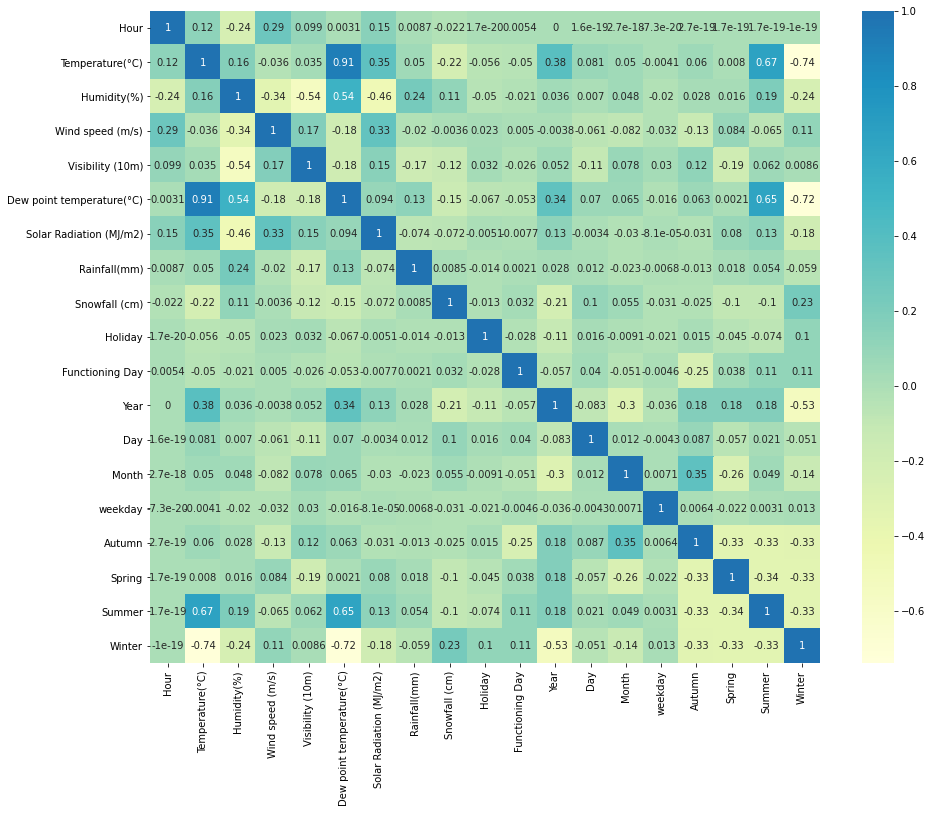

In [36]:
#checking multi-collinearity

plt.figure(figsize=(15,12))
sns.heatmap(df[df.describe().columns[1:]].corr(),annot=True,cmap="YlGnBu",center=0.5)

* Temperature and Dew point temperature are highly correlated. We can add them to make one single column


In [37]:
df['Temperature_and_DP_Temp'] = [df['Temperature(°C)'][i]+df['Dew point temperature(°C)'][i] for i in range(len(df))]
df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

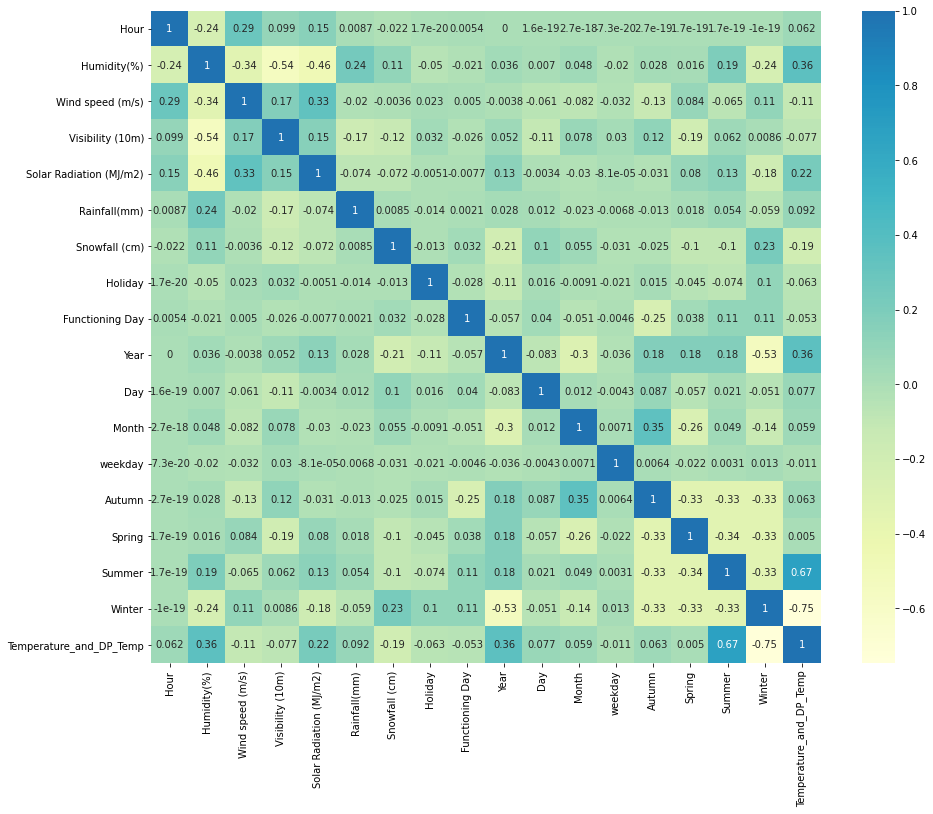

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(df[df.describe().columns[1:]].corr(),annot=True,cmap="YlGnBu",center=0.5)

In [39]:
#Correlation with Dependent Variable
np.round(df.corr()['Rented Bike Count'],3)

Rented Bike Count          1.000
Hour                       0.410
Humidity(%)               -0.200
Wind speed (m/s)           0.121
Visibility (10m)           0.199
Solar Radiation (MJ/m2)    0.262
Rainfall(mm)              -0.123
Snowfall (cm)             -0.142
Holiday                   -0.072
Functioning Day            0.204
Year                       0.215
Day                        0.047
Month                      0.071
weekday                   -0.022
Autumn                     0.103
Spring                     0.023
Summer                     0.297
Winter                    -0.425
Temperature_and_DP_Temp    0.466
Name: Rented Bike Count, dtype: float64

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','month']]])

variables           VIF
0                      Hour  1.208234e+00
1               Humidity(%)  3.154455e+00
2          Wind speed (m/s)  1.307612e+00
3          Visibility (10m)  1.731487e+00
4   Solar Radiation (MJ/m2)  1.921777e+00
5              Rainfall(mm)  1.072672e+00
6             Snowfall (cm)  1.142777e+00
7                   Holiday  1.030469e+00
8           Functioning Day  1.086150e+00
9                      Year  1.934574e+00
10                      Day  1.097996e+00
11                    Month  1.615373e+00
12                  weekday  1.006595e+00
13                   Autumn  2.528524e+07
14                   Spring  2.555913e+07
15                   Summer  2.556271e+07
16                   Winter  2.499395e+07
17  Temperature_and_DP_Temp  5.836396e+00

#Model Building

In [42]:
x = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']
x.head(3)

Hour  Humidity(%)  Wind speed (m/s)  ...  Summer  Winter  Temperature_and_DP_Temp
0     0           37               2.2  ...       0       1                    -22.8
1     1           38               0.8  ...       0       1                    -23.1
2     2           39               1.0  ...       0       1                    -23.7

[3 rows x 18 columns]

**Train Test split model**

In [43]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 18)
(7008,)
(1752, 18)
(1752,)


##Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as met

In [45]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
train_pred = linear_reg.predict(x_train)
linear_reg.score(x_train,y_train)

0.5532778665257988

In [47]:
met.r2_score(y_train,linear_reg.predict(x_train))

0.5532778665257988

In [48]:
met.r2_score(y_test,linear_reg.predict(x_test))


0.5470370255349097

* For Linear Regression our model is too general.
* We have to make our model more complex for better discretion.

##Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
for min_sam_leaf in range(1,50):
  DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=min_sam_leaf)
  DT_reg.fit(x_train,y_train)
  print(f"\nR-sqared on train dataset when min leaf {min_sam_leaf} : {met.r2_score(y_train,DT_reg.predict(x_train))}")
  print(f"R-sqared on test dataset when min leaf {min_sam_leaf}: {met.r2_score(y_test,DT_reg.predict(x_test))}")
  print(f"Mean absolute error on test dataset when min leaf {min_sam_leaf}: {met.mean_absolute_error(y_test,DT_reg.predict(x_test))}")
  print(f"Mean squared error on test dataset when min leaf {min_sam_leaf}: {met.mean_squared_error(y_test,DT_reg.predict(x_test))}")


R-sqared on train dataset when min leaf 1 : 1.0
R-sqared on test dataset when min leaf 1: 0.8250794006069578
Mean absolute error on test dataset when min leaf 1: 155.0439497716895
Mean squared error on test dataset when min leaf 1: 73208.22203196347

R-sqared on train dataset when min leaf 2 : 0.9880097379172146
R-sqared on test dataset when min leaf 2: 0.8368909259052268
Mean absolute error on test dataset when min leaf 2: 147.6214802130898
Mean squared error on test dataset when min leaf 2: 68264.8318905378

R-sqared on train dataset when min leaf 3 : 0.9745621069393647
R-sqared on test dataset when min leaf 3: 0.8349144715809844
Mean absolute error on test dataset when min leaf 3: 149.77652207001523
Mean squared error on test dataset when min leaf 3: 69092.02267028159

R-sqared on train dataset when min leaf 4 : 0.9594194433499407
R-sqared on test dataset when min leaf 4: 0.836294388430584
Mean absolute error on test dataset when min leaf 4: 150.6960072841922
Mean squared error on 

* As expected Decision tree has overfitted the data.
* But it is doing way better than linear regression on **test data** as well.
*At minimum Sample leaf 5 the model giving highest r-squared score and least errors on test. 


In [83]:
DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=5)
DT_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [88]:
# Performance on Test Dataset

print(f"r-square score on test data :{met.r2_score(y_test,DT_reg.predict(x_test))}")
print(f"homogeneity score on test data :{met.homogeneity_score(y_test,DT_reg.predict(x_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(y_test,DT_reg.predict(x_test))}")


r-square score on test data :0.8437848066215998
homogeneity score on test data :0.8661593725967291
mean squared error score on test data :65379.58708862584



**Feature Importance: Decision Tree**

In [107]:
features = pd.DataFrame(list(zip(DT_reg.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

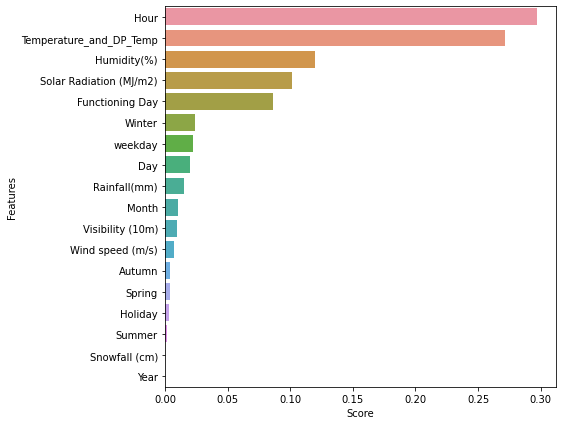

In [114]:
plt.figure(figsize=(7,7))
sns.barplot(x=features['Score'],y=features['Features'])

##Gredient Boost model

In [152]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [154]:
#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [159]:
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...ange=None,
                  

In [171]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [175]:
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 8,
 min_samples_leaf= 40,
 min_samples_split = 50,
 n_estimators = 120)
gb_boost_with_best_perams.fit(x_train,y_train)

  

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [177]:
#Gredient boost score on train data

gb_boost_with_best_perams.score(x_train,y_train)

0.962263141525891

In [179]:
#Gredient boost score on test data
gb_boost_with_best_perams.score(x_test,y_test)

0.922398585535865

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


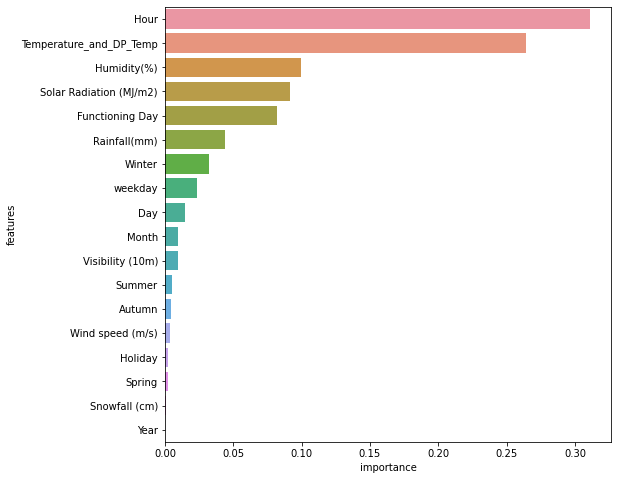

In [181]:
plt.figure(figsize=(8,8))
features_importance_gb = pd.DataFrame({'features':x_train.columns,'importance' : gb_boost_with_best_perams.feature_importances_})
features_importance_gb.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(features_importance_gb['importance'],features_importance_gb['features'])

* Feature importance graph is about same in Decision tree and gredient boost ensembling.
* Error Rates were very high in other models. Gredient boost trains ensembles on errors rates so, it has better scores.

In [200]:
explainer = shap.Explainer(gb_boost_with_best_perams,x_train)
shap_value = explainer(x_train)

 98%|===================| 6893/7008 [00:58<00:00]       

In [201]:
shap_value

.values =
array([[-1.06062944e+02, -6.95589543e+00,  9.48065160e+00, ...,
        -6.56853199e+00, -7.80353668e+01, -1.52277438e+02],
       [ 9.27396582e+02,  1.17907351e+02, -2.86731277e+00, ...,
         2.39716408e+01,  3.99918407e+01,  4.93008834e+02],
       [-3.07905968e+02,  3.02114502e+01,  1.51148521e+01, ...,
         7.52326852e+00,  3.43090654e+01,  7.10788443e+01],
       ...,
       [-4.17997526e+02,  4.74668075e+01,  3.18884152e+00, ...,
         2.09996544e+01,  3.39606365e+01,  2.80370462e+02],
       [-1.26758148e+02,  1.47217758e+01, -2.80409085e-01, ...,
        -1.56339396e+01,  5.18701009e+01, -1.12479246e+02],
       [ 2.21882102e+02, -2.28646566e+02,  3.82729377e+00, ...,
        -1.28118426e+01,  4.15605172e+01, -1.75464877e+02]])

.base_values =
array([742.10025986, 742.10025986, 742.10025986, ..., 742.10025986,
       742.10025986, 742.10025986])

.data =
array([[15. , 62. ,  0.6, ...,  0. ,  1. ,  9.5],
       [18. , 57. ,  2.4, ...,  1. ,  0. , 47.4],
    

In [202]:
shap_value.shape

(7008, 18)

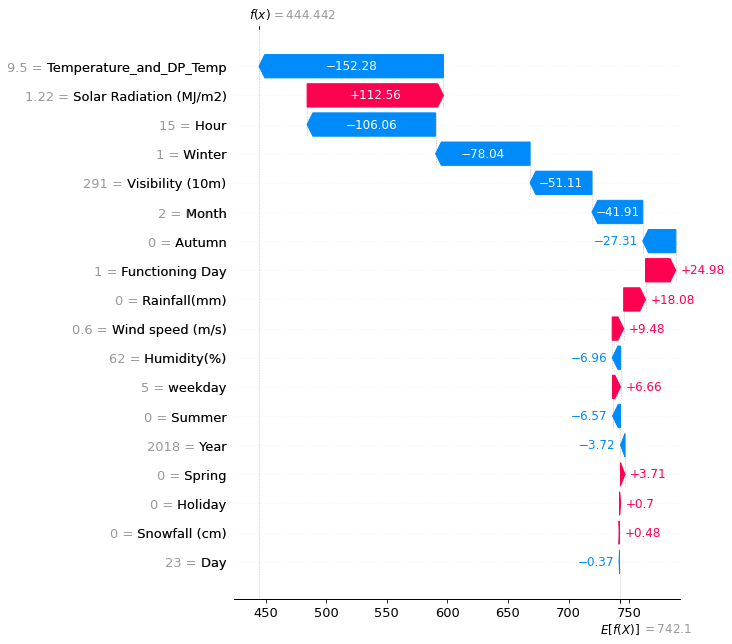

In [205]:
shap.plots.waterfall(shap_value[0],max_display=50)

* Waterfall plots are designed to display explanations for individual predictions.
* The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

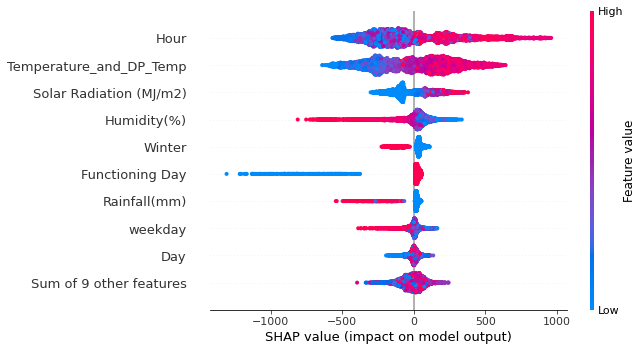

In [206]:
shap.plots.beeswarm(shap_value)

* The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output.
*  The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) of that feature, and dots “pile up” along each feature row to show density. Color is used to display the original value of a feature (shap_values.data[instance,feature]). In the plot below we can see that ``Hour`` is the most important feature on average.

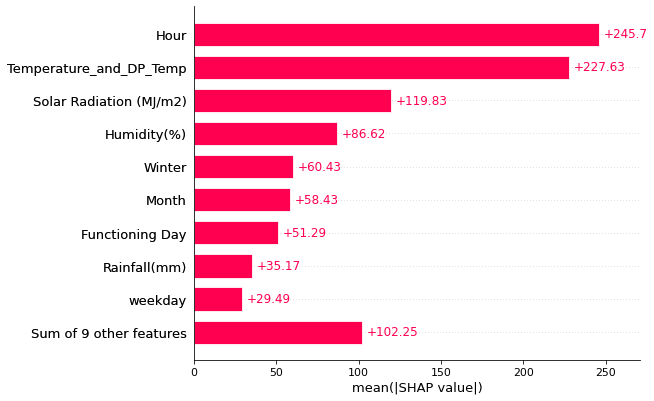

In [212]:
shap.plots.bar(shap_value)

In [213]:
shap.initjs()
shap.plots.force(shap_value[0])
